# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [ ]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import pandas as pd
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# uncomment later
!pip install sentence-transformers
!pip install scipy
from sentence_transformers import SentenceTransformer


     |████████████████████████████████| 79 kB 3.2 MB/s 
     |████████████████████████████████| 3.5 MB 29.8 MB/s 
     |████████████████████████████████| 1.2 MB 36.9 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 596 kB 52.0 MB/s 
     |████████████████████████████████| 895 kB 36.3 MB/s 
     |████████████████████████████████| 6.8 MB 29.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=ff0c8a1f8e6f53c88cb2d123be5cce5c45fabbe341282fdf8bea672939a08d96
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [ ]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

print(list(newsgroups_train.target_names))

['data', 'filenames', 'target_names', 'target', 'DESCR']
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
newsgroups_train.data[1]

"From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 11\nNNTP-Posting-Host: carson.u.washington.edu\n\nA fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll. Thanks.\n\nGuy Kuo <guykuo@u.washington.edu>\n"

In [ ]:
newsgroups_train.target[0]

7

In [ ]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(remove_tag(sentence)))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [ ]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding

In [ ]:
# print(len(newsgroups_train.data))
# review_embedding_sample=get_review_embedding(newsgroups_train.data[0])

In [ ]:
def create_embeddings(articles):
  embedded=[]
  for a in articles:
    reviewed_a=get_review_embedding(a)
    embedded.append(reviewed_a)
  return embedded

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/My Drive/smai/
# drive_data=pd.read_csv('data1.csv',index_col=[0])

In [ ]:
X=create_embeddings(newsgroups_train.data)
y=newsgroups_train.target

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
# X=drive_data.to_numpy()
Z=X
X=X[~np.all(X == 0, axis=1)]

In [ ]:
# zeros=0
# for i in range(len(X)):
#   if np.all((X[i] == 0)):
#     zeros+=1
# zeros

In [ ]:
#X=create_embeddings(newsgroups_train.data[:2000])
#y=newsgroups_train.target[:2000]

([<matplotlib.axis.XTick at 0x7f8030c6c090>,
 <a list of 10 Text major ticklabel objects>)

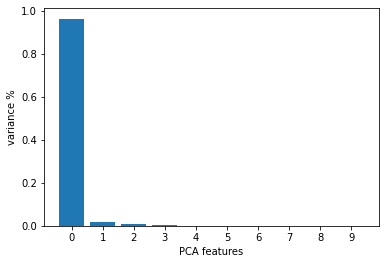

In [115]:
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
def pca_convert(data,components):
    pca=PCA(n_components=components)
    #X_std=X
    #X_std = StandardScaler().fit_transform(data)
    x_p=pd.DataFrame(pca.fit_transform(X))
    return x_p

pca=PCA(n_components=10)
#X_std = StandardScaler().fit_transform(X)
x_p=pd.DataFrame(pca.fit_transform(X))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

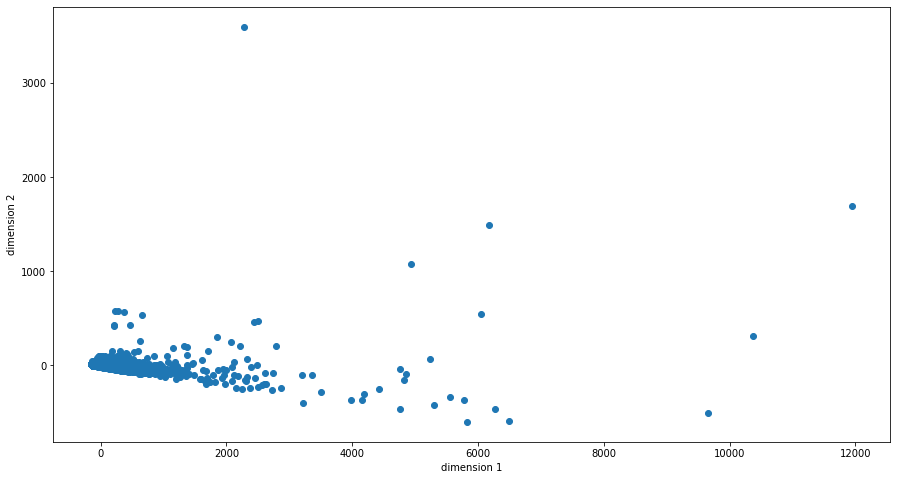

In [116]:
x_pca=pca_convert(X,2)
x_pca=x_pca.to_numpy()
plt.figure(figsize=(15,8))
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.show()

# K_Means Algorithm


In [117]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, random_state=42).fit(x_pca)
clusters=model.labels_


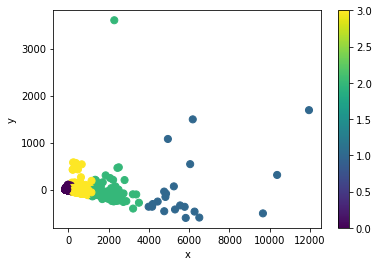

In [118]:
#code for visualisation of clusters

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x_pca[:,0], x_pca[:,1],c=clusters,s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()

# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







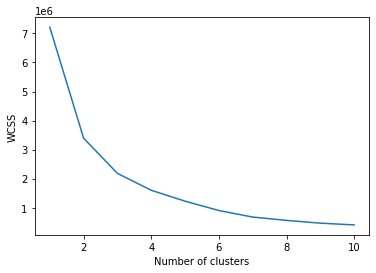

In [ ]:
def elbow_method(data,max):
  k_values=[i for i in range(1,max+1)]
  scores=[]
  for k in k_values:
    model = KMeans(n_clusters=k,random_state=42)
    model.fit(data)
    scores.append(model.inertia_)
  plt.plot(k_values,scores)
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS') 
  plt.show()
elbow_method(x_pca,10)

The elbow method is used to make an estimate for finding the optimal number of clusters in K-means.
Here we plot the value of the cost function represented by WCSS, where if K increases the average distortion decreases as each cluster will have fewer constituent instances and each instance will come closer to their respective centroids.But the improvements in average distortion decreases with increase in the value of K.

Now to find the optimal number of clusters we need to look at the values present near the elbow cap. We can see its ranging from 2 to 3 so we can assume the optimal value of k will lie in this range. 

# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




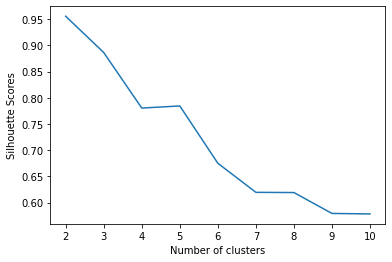

In [119]:
from sklearn.metrics import silhouette_score
def compute_silhouette_score(data,k):
    k_values=[i for i in range(2,k+1)]
    scores=[]
    for k in k_values:
        model = KMeans(n_clusters=k,random_state=42)
        model.fit(data)
        labels = model.labels_
        si_score=silhouette_score(data,labels)
        scores.append(si_score)
    plt.plot(k_values,scores)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.show()
compute_silhouette_score(x_pca,10)

Silhouette score is used to tell how good the quality of clusters created using our selected clustering algorithm in terms of how well samples are clustered with other samples that are similar to each other.
The Silhouette Coefficient is defined for each sample and is composed of two scores:

`a`: The mean distance between a sample and all other points in the same class.

`b`: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient is for a single sample is then given as:
\begin{align}
        s=\frac{b-a}{max(a,b)}
    \end{align}

From the silhoutte graph scores we can infer that the optimal value of k has a high possiblity of being 2

# Agglomerative clustering

In agglomerative clustering we will use the optimal value of k=2 we found from the elbow and silhoutte method

In [ ]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# def aglo_clustering(data,k):
#   clustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(data)
#   return clustering.labels_
# labels_a=aglo_clustering(x_pca,2)

In [120]:
# Applying Agglomerative clustering on the reduced dataset after PCA and using tuned Distance threshold
model = AgglomerativeClustering(distance_threshold=40000,linkage='ward', n_clusters=None).fit(x_pca)
labels_c=model.labels_

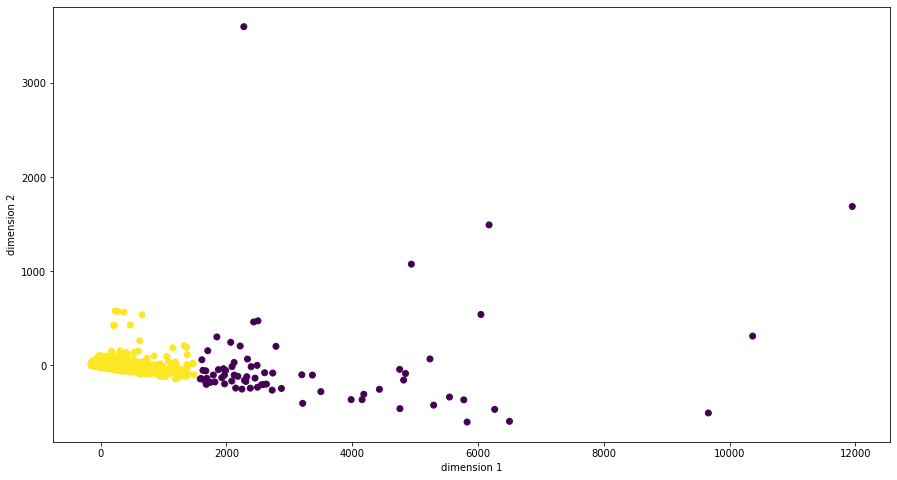

In [121]:
#code for visualisation of clusters
plt.figure(figsize=(15,8))
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.scatter(x_pca[:,0], x_pca[:,1],c=labels_c)
plt.show()

# Dendogram


*   Try to understand the difference between agglomerative clustering and divisive clustering
*   Plot dendograms for Agglomerative clustering
*   Find the optimal number of clusters with the help of Dendogram



##### Agglomerative Clustering
Agglomerative Clustering is also known as "bottom-up approach" of Hierarchial clustering.
In this approach we take all data points as clusters and start merging it based on the distance between clusters. This will be done in a repeatitive manner until we form one big cluster.

##### Divisive Clustering
Divisive Clustering is known as "top-down approach" of Hierarchial Clustering.
In this approach we start with one cluster and then split is performed as we move down the hierarchy.

### Agglomerative vs Divisive Clustering:
* Complexity: Divisive clustering is more complex than Agglomerative as we require a flat clustering subroutine to split each cluster to its individual cluster where things become very messy.
* Time Complexity: The naive Agglomerative runs in O(n3) which can be brought down to O(n2log(n)), where as Divisive has linear time complexity.
* Accuracy: Agglomerative makes decision using local distribution wheras divisive makes decisions using global distribution. So it more accurate.  

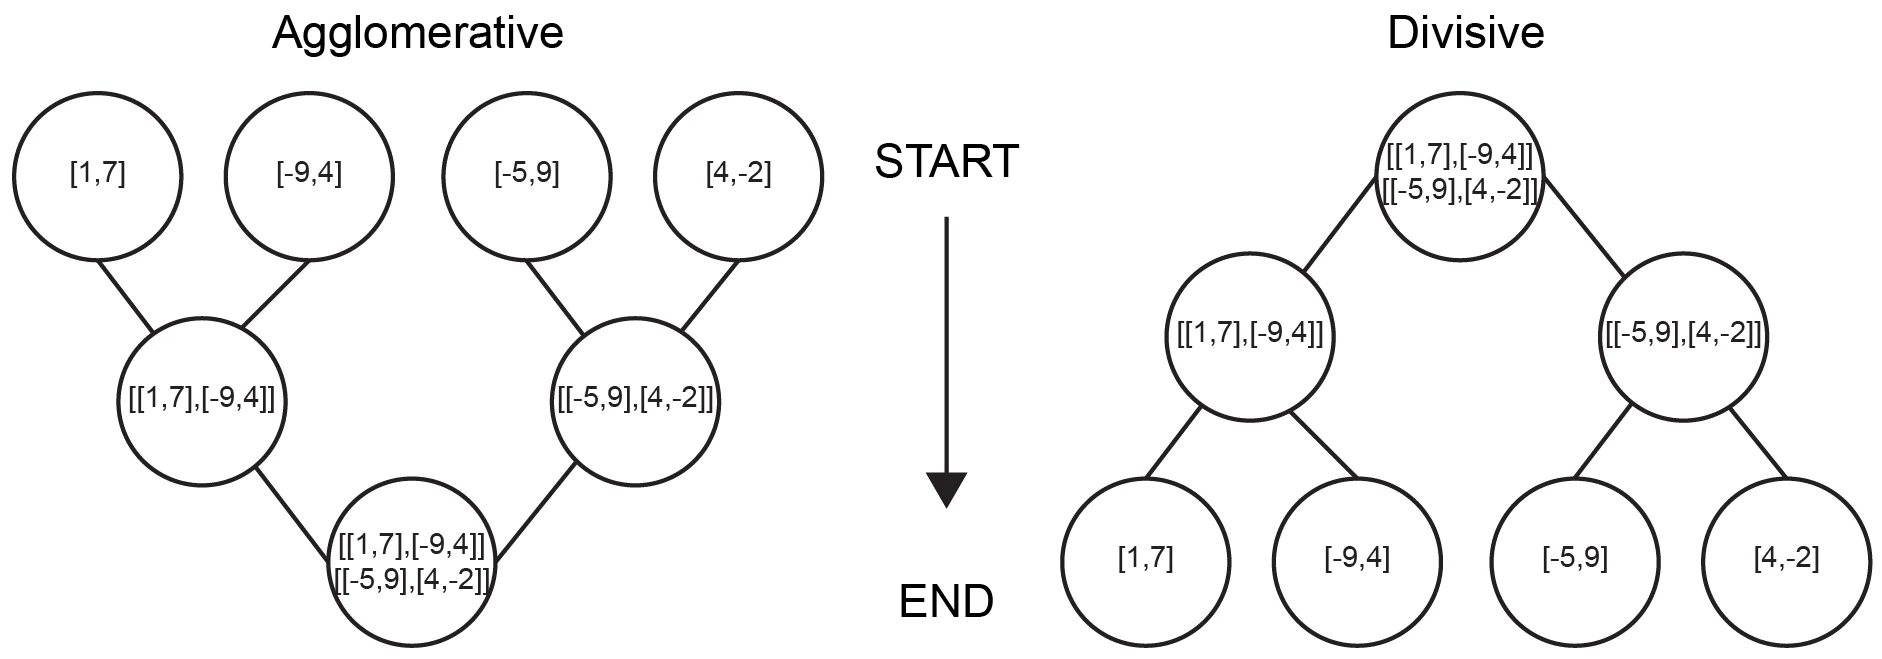


In [122]:
import scipy.cluster.hierarchy as shc
# linkage_matrix=shc.linkage(x_pca, method='ward')

In [127]:
# Utility code from SKLEARN:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    plt.figure(figsize=(20,10))
    dendrogram(linkage_matrix, **kwargs)
    plt.title(f"Estimated no. of clusters using Agglomerative clustering = {1+np.amax(model.labels_)}")


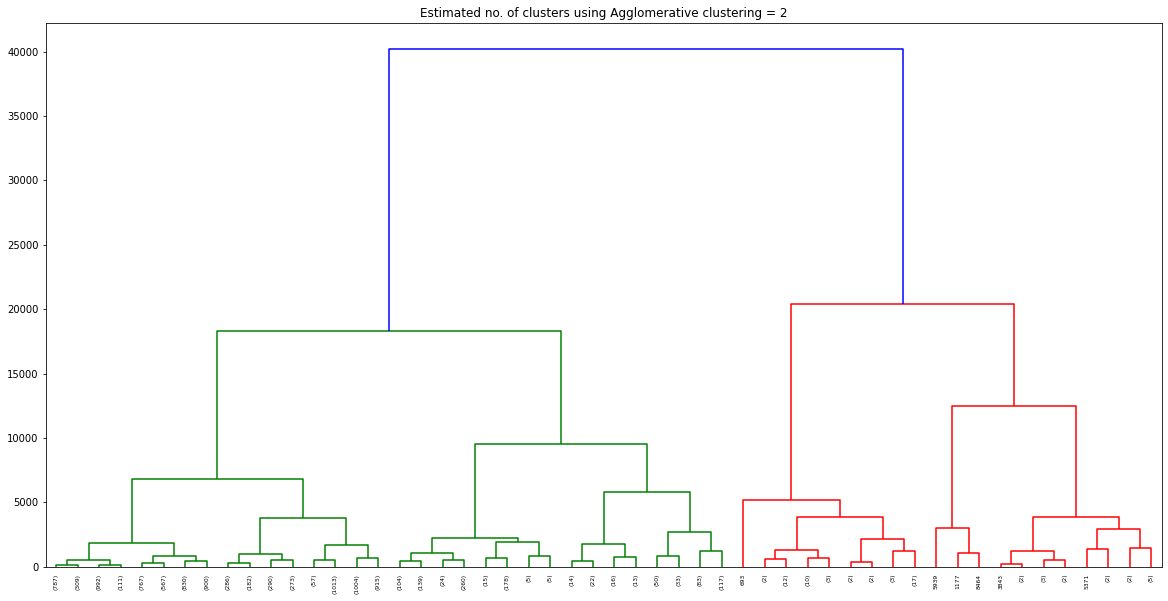

In [128]:
# Dendogram for Agglomerative Clustering
plot_dendrogram(model,truncate_mode="level", p=5)


In [ ]:
# # code to write dendogram
# plt.figure(figsize=(20,10))
# plt.title("Dendogram")  
# dend = shc.dendrogram(linkage_matrix,truncate_mode="level", p=5)

Reference: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789952292/2/ch02lvl1sec13/agglomerative-versus-divisive-clustering

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


